In [169]:
import tensorflow as tf

In [170]:
tf.__version__

'2.6.0'

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pathlib

pathlib 文件目录
- pathlib.Path(data_dir)
- .glob(*/)

In [172]:
data_dir='./2_class'

In [173]:
data_root= pathlib.Path(data_dir)

In [174]:
data_root

WindowsPath('2_class')

In [175]:
for item in data_root.iterdir():
    print(item)

2_class\airplane
2_class\lake


### 提取所有路径

In [176]:
all_image_path=list(data_root.glob('*/*') )  #所有目录的文件

In [177]:
len(all_image_path)

1400

In [178]:
all_image_path[:3]

[WindowsPath('2_class/airplane/airplane_001.jpg'),
 WindowsPath('2_class/airplane/airplane_002.jpg'),
 WindowsPath('2_class/airplane/airplane_003.jpg')]

In [179]:
all_image_path[-3:]

[WindowsPath('2_class/lake/lake_698.jpg'),
 WindowsPath('2_class/lake/lake_699.jpg'),
 WindowsPath('2_class/lake/lake_700.jpg')]

In [180]:
all_image_path=[str(path ) for path in all_image_path]

In [181]:
all_image_path[:3]

['2_class\\airplane\\airplane_001.jpg',
 '2_class\\airplane\\airplane_002.jpg',
 '2_class\\airplane\\airplane_003.jpg']

### 乱序

In [182]:
import random 

In [183]:
random.shuffle(all_image_path)

In [184]:
all_image_path[-3:]

['2_class\\lake\\lake_574.jpg',
 '2_class\\lake\\lake_070.jpg',
 '2_class\\lake\\lake_562.jpg']

In [185]:
image_count=len(all_image_path)
image_count

1400

### 添加所有图片的label

In [186]:
label_name=sorted(item.name for item in data_root.glob('*/'))
label_name

['airplane', 'lake']

In [187]:
#编码
label_to_index=dict((name,index) for index,name in enumerate(label_name))

In [188]:
label_to_index

{'airplane': 0, 'lake': 1}

In [189]:
pathlib.Path( '2_class\\airplane\\airplane_213.jpg').parent.name

'airplane'

所有的label

In [190]:
all_image_label=[label_to_index [pathlib.Path(p).parent.name] for p in all_image_path]
all_image_label[:5]

[1, 1, 0, 1, 0]

In [191]:
import IPython.display as display

index_to_label 标签，看转换成文字方便检查

In [192]:
index_to_label=dict((v,k) for  k,v in label_to_index.items())

In [193]:
index_to_label

{0: 'airplane', 1: 'lake'}

随机打印3张图片

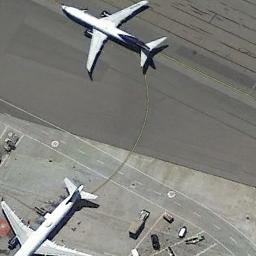

airplane


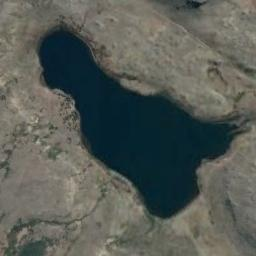

lake


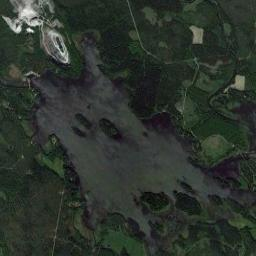

lake


In [194]:
for item in range(3):
    image_index=random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])
    

### 图片加载
使用tensorflow的方法提取图片
- tf.io.read_file(image_path)
- 解码 tf.image.decode_image(img_raw)

可以写成一个函数实现

In [195]:
image_path0=all_image_path[0]
image_path0

'2_class\\lake\\lake_299.jpg'

In [196]:
img_raw=tf.io.read_file(image_path0)
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

In [197]:
img_tensor=tf.image.decode_image(img_raw)
img_tensor.shape

TensorShape([256, 256, 3])

In [198]:
img_tensor.dtype

tf.uint8

标准化

imag_tensor  tensor数据类型

In [199]:
imag_tensor=tf.cast(img_tensor,tf.float32)

In [200]:
img_tensor=img_tensor/255
img_tensor

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.1254902 , 0.19215687, 0.12941177],
        [0.14901961, 0.21568628, 0.15294118],
        [0.15686275, 0.22352941, 0.16078432],
        ...,
        [0.58431375, 0.49803922, 0.40784314],
        [0.60784316, 0.5254902 , 0.44313726],
        [0.61960787, 0.5372549 , 0.45490196]],

       [[0.11764706, 0.18431373, 0.12156863],
        [0.13725491, 0.20392157, 0.14117648],
        [0.14117648, 0.20784314, 0.14509805],
        ...,
        [0.6       , 0.52156866, 0.42745098],
        [0.6       , 0.5176471 , 0.43529412],
        [0.5921569 , 0.50980395, 0.42745098]],

       [[0.15686275, 0.21176471, 0.14509805],
        [0.17254902, 0.22745098, 0.16078432],
        [0.17254902, 0.22745098, 0.16078432],
        ...,
        [0.6039216 , 0.52156866, 0.4392157 ],
        [0.57254905, 0.49019608, 0.40784314],
        [0.5294118 , 0.45882353, 0.37254903]],

       ...,

       [[0.1764706 , 0.24313726, 0.17254902],
        [0.16

In [201]:
img_tensor.numpy()

array([[[0.1254902 , 0.19215687, 0.12941177],
        [0.14901961, 0.21568628, 0.15294118],
        [0.15686275, 0.22352941, 0.16078432],
        ...,
        [0.58431375, 0.49803922, 0.40784314],
        [0.60784316, 0.5254902 , 0.44313726],
        [0.61960787, 0.5372549 , 0.45490196]],

       [[0.11764706, 0.18431373, 0.12156863],
        [0.13725491, 0.20392157, 0.14117648],
        [0.14117648, 0.20784314, 0.14509805],
        ...,
        [0.6       , 0.52156866, 0.42745098],
        [0.6       , 0.5176471 , 0.43529412],
        [0.5921569 , 0.50980395, 0.42745098]],

       [[0.15686275, 0.21176471, 0.14509805],
        [0.17254902, 0.22745098, 0.16078432],
        [0.17254902, 0.22745098, 0.16078432],
        ...,
        [0.6039216 , 0.52156866, 0.4392157 ],
        [0.57254905, 0.49019608, 0.40784314],
        [0.5294118 , 0.45882353, 0.37254903]],

       ...,

       [[0.1764706 , 0.24313726, 0.17254902],
        [0.16862746, 0.23529412, 0.16470589],
        [0.15686275, 0

可以，加载，预处理图片的函数

In [202]:
def load_preprocess_image(img_path):
    img_raw=tf.io.read_file(img_path)
    img_tensor=tf.image.decode_jpeg(img_raw,channels=3)  # 3彩色图片
    img_tensor=tf.image.resize(img_tensor,[256,256])  # 改变图像大小的方法，  通知时图片
    imag_tensor=tf.cast(img_tensor,tf.float32)
    img=img_tensor/255
    return img

In [203]:
# plt.imshow(load_preprocess_image(all_image_path[10]))

In [204]:
path_ds=tf.data.Dataset.from_tensor_slices(all_image_path)
path_ds   #tf.string>

<TensorSliceDataset shapes: (), types: tf.string>

In [205]:
image_dataset=path_ds.map(load_preprocess_image)
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [206]:
label_dataset=tf.data.Dataset.from_tensor_slices(all_image_label)
label_dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [207]:
for label in label_dataset.take(10):
    print(label.numpy())

1
1
0
1
0
1
1
0
0
0


### 图片和标签合并成一个dataset
- tf.data.Dataset.zip((image_dataset,label_dataset))

In [208]:
dataset=tf.data.Dataset.zip((image_dataset,label_dataset))
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

### 划分训练数据和测试数据
- test_dataset=dataset.take(test_count)

- train_dataset=dataset.skip(test_count)

In [209]:
test_count=int(image_count*0.2)
trian_count=image_count-test_count

In [210]:
test_count,trian_count

(280, 1120)

In [211]:
train_dataset=dataset.skip(test_count)
train_dataset

<SkipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [212]:
test_dataset=dataset.take(test_count)

In [213]:
batch_size=32

In [214]:
train_dataset=train_dataset.repeat().shuffle(buffer_size=trian_count).batch(batch_size)
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [215]:
test_dataset=test_dataset.repeat().batch(batch_size)

### 建立模型
<code>
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BathNormalization())
model.add(tf.keras.layers.Activation='relu')

在层训练，添加批标准化

In [216]:
model=tf.keras.Sequential()
#卷积层
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))

#池化层
model.add(tf.keras.layers.MaxPooling2D())

#卷积层
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BathNormalization())
model.add(tf.keras.layers.Activation='relu')


model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                                 

In [217]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 59, 59, 512)      

In [218]:
model.output_shape

(None, 1)

### 训练数据

In [219]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [220]:
# 告诉一个batch需要训练多少次
steps_per_epoch=trian_count// batch_size
validation_steps=test_count// batch_size

In [ ]:
hist=model.fit(train_dataset,epochs=30,steps_per_epoch=steps_per_epoch,validation_data=test_dataset,validation_steps=validation_steps)

Epoch 1/30
16/35 [============>.................] - ETA: 5:18 - loss: 0.6914 - acc: 0.5449